In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

C:\Users\W4TALENT\AppData\Local\Temp\ipykernel_16500\3878587676.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## import and understand data

In [2]:
housing=pd.read_csv('G:/iiitB_ai-ml-pg/advancedregression/advanced-regression-assignment/train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.shape

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### checking how many columns have missing data

In [8]:
#Create a new dataframe with all columns with data missing < 45% for our  further analysis
total_missing = housing.isnull().sum().sort_values(ascending=False)
missing_perc= (total_missing*100/housing.shape[0]).sort_values(ascending=False)
housing_zero_missing=housing.loc[:, missing_perc<45]
housing_zero_missing.isnull().sum().sort_values(ascending=False)
housing_zero_missing.shape

(1460, 75)

## imputing other missing values

In [9]:
housing_zero_missing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [10]:
# Get the value counts of all the columns

for column in housing_zero_missing:
    
    print(housing_zero_missing[column].astype('category').value_counts())
    print('___________________________________________________')

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
___________________________________________________
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
___________________________________________________
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
___________________________________________________
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
63.0      17
79.0      17
55.0      17
72.0      17
100.0     16
51.0      15
74.0      15
66.0      15
52.0      14
59.0      13
71.0      12
82.0      12
57.0      12
67.0      1

DATA IMPUTATION FOR CATEGORICAL COLUMNS¶

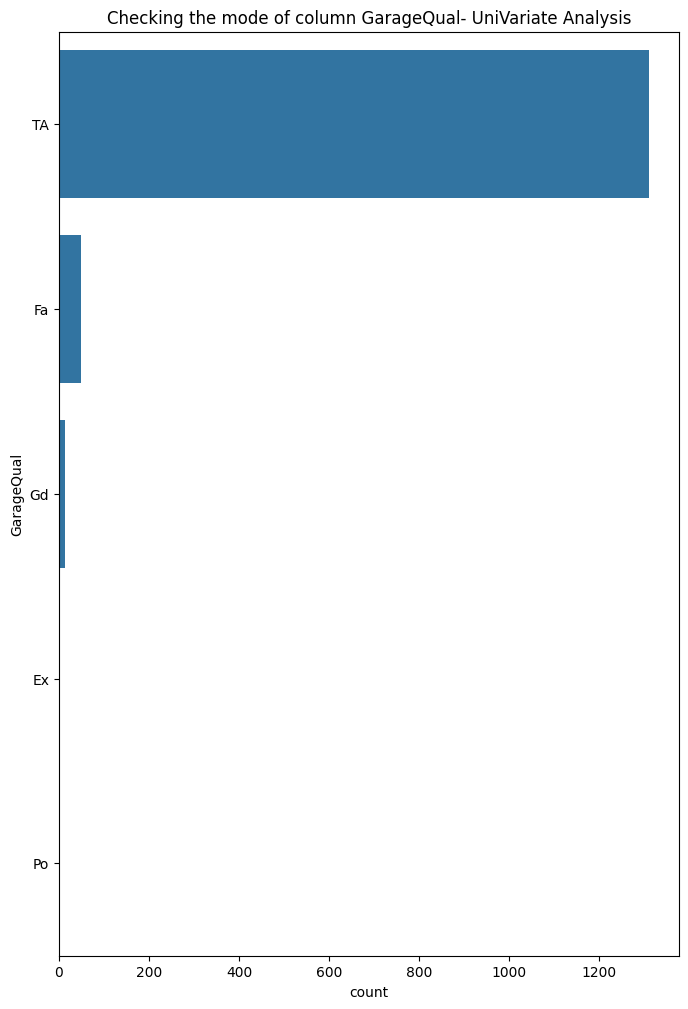

In [11]:
# Data imputation for column 'GarageQual'

plt.figure(figsize=(8,12))
sns.countplot(housing_zero_missing.GarageQual)
plt.title("Checking the mode of column GarageQual- UniVariate Analysis")
plt.show()

In [12]:
housing_zero_missing.GarageQual.value_counts()


GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [13]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
housing_zero_missing['GarageQual'] = housing_zero_missing['GarageQual'].replace(np.nan,'TA')

In [14]:
housing_zero_missing['GarageQual'].dtype


dtype('O')

In [15]:
housing_zero_missing.GarageQual.value_counts()


GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

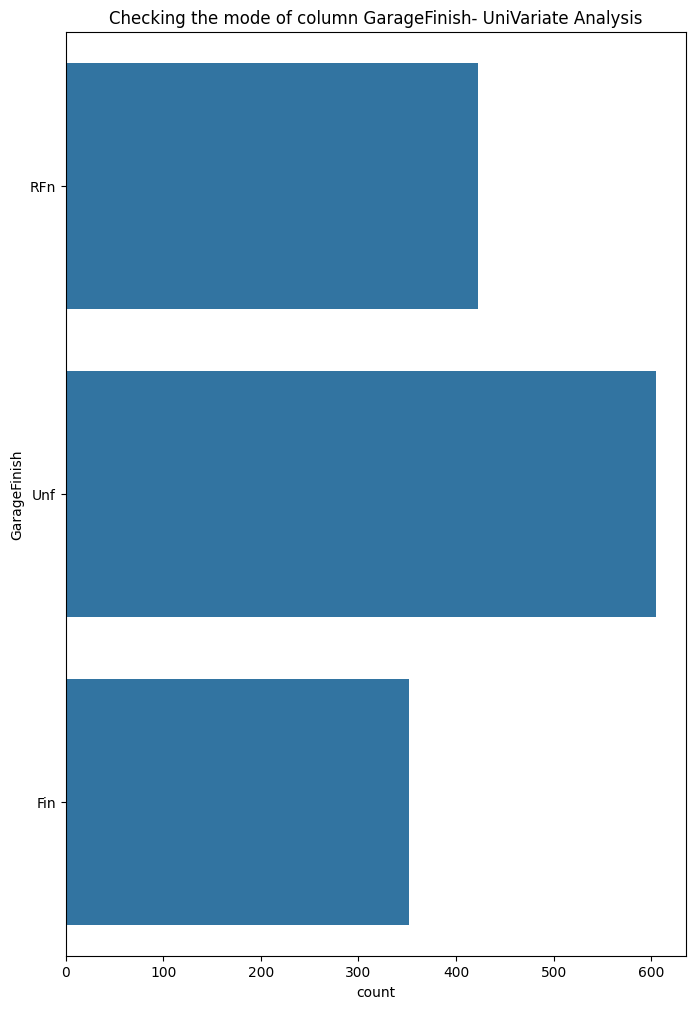

In [16]:
# Data imputation for column 'GarageFinish'

plt.figure(figsize=(8,12))
sns.countplot(housing_zero_missing.GarageFinish)
plt.title("Checking the mode of column GarageFinish- UniVariate Analysis")
plt.show()

#### As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown

In [17]:
housing_zero_missing['GarageFinish']=housing_zero_missing['GarageFinish'].replace(np.nan,'Unknown')
housing_zero_missing['GarageFinish'].value_counts()


GarageFinish
Unf        605
RFn        422
Fin        352
Unknown     81
Name: count, dtype: int64

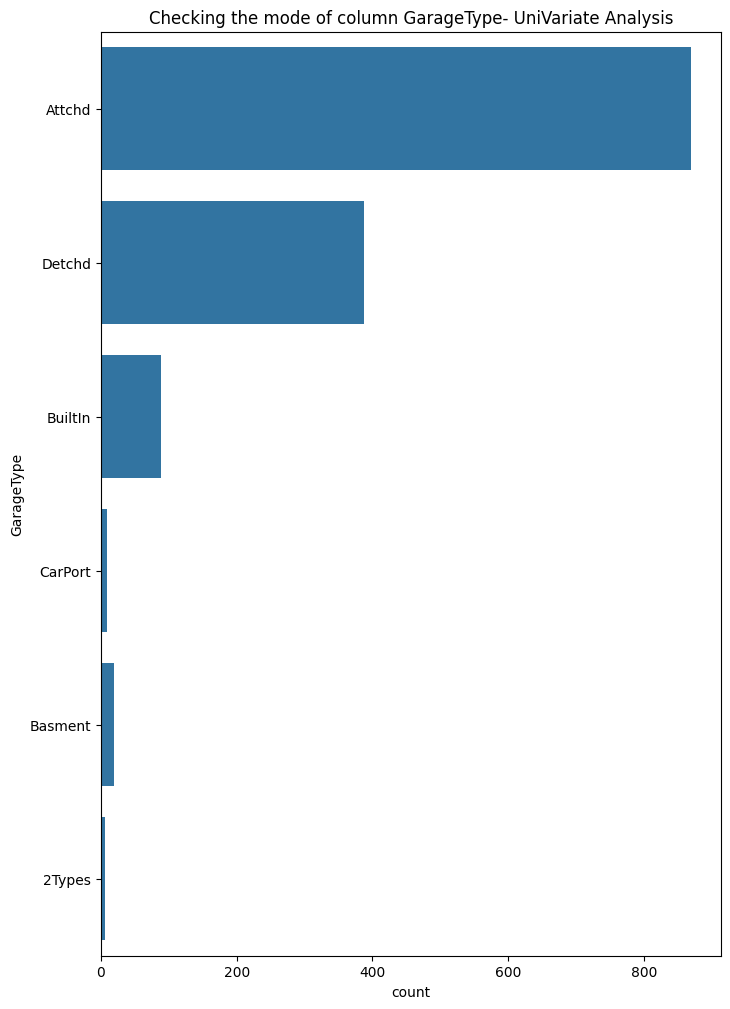

In [18]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,12))
sns.countplot(housing_zero_missing.GarageType)
plt.title("Checking the mode of column GarageType- UniVariate Analysis")
plt.show()

In [19]:
housing_zero_missing['GarageType']=housing_zero_missing['GarageType'].replace(np.nan,'Attchd')
housing_zero_missing['GarageType'].value_counts()

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

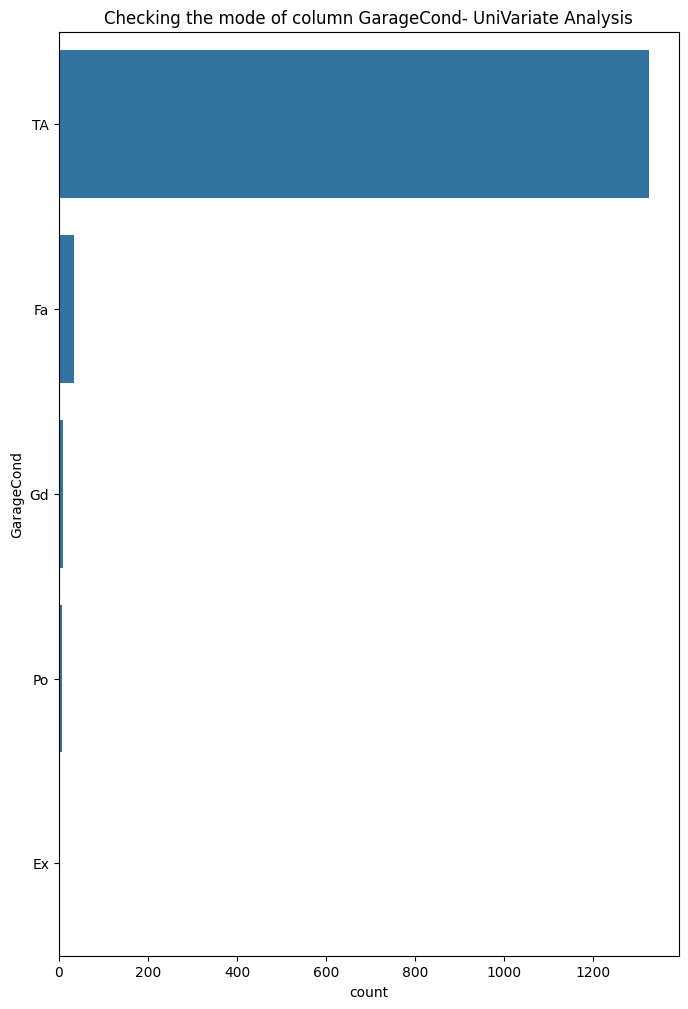

In [20]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(housing_zero_missing.GarageCond)
plt.title("Checking the mode of column GarageCond- UniVariate Analysis")
plt.show()

In [21]:
housing_zero_missing['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [22]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE

housing_zero_missing['GarageCond']=housing_zero_missing['GarageCond'].replace(np.nan,'TA')
housing_zero_missing['GarageCond'].value_counts()

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

## DATA IMPUTATION FOR NUMERICAL COLUMNS¶

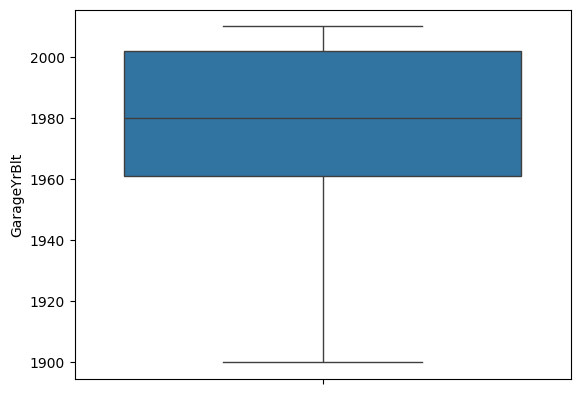

In [23]:
#PLots for outlier analysis of GarageYrBlt
sns.boxplot(housing_zero_missing.GarageYrBlt)
plt.show()

There are no outiers so imputing missing values with mean


In [24]:
housing_zero_missing['GarageYrBlt'].fillna(housing_zero_missing['GarageYrBlt'].mean(),inplace=True)

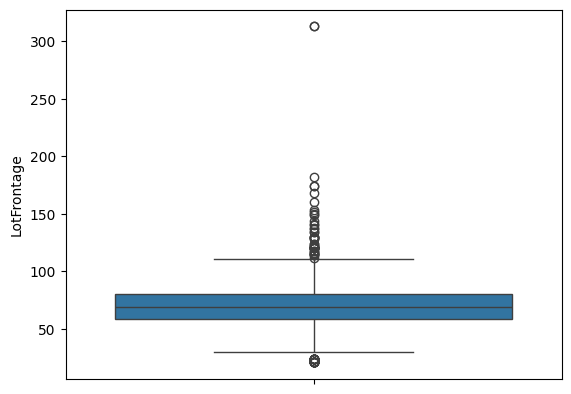

In [25]:
#PLots for outlier analysis for LotFrontage
sns.boxplot(housing_zero_missing.LotFrontage)
plt.show()

In [26]:
# As there are outliers imputing with median
housing_zero_missing['LotFrontage'].fillna(housing_zero_missing['LotFrontage'].median(),inplace=True)


In [27]:
# As the other columns have less than 3% of Nan Values we chose to drop those rows .

housing_zero_missing.dropna(inplace=True)

In [28]:
#Final check of missing values 
Total_missing = housing_zero_missing.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_zero_missing.isnull().sum()/housing_zero_missing.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
Id,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


All missing values are handled!!!¶

## Data Exploration - Exploratory data analysis

In [29]:
housing_zero_missing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [30]:
housing_zero_missing['Age']=housing_zero_missing['YrSold']-housing_zero_missing['YearRemodAdd']
housing_zero_missing['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [31]:
housing_zero_missing=housing_zero_missing.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [32]:
housing_zero_missing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


Dropping the id as it does not give any infomration

In [33]:
housing_zero_missing=housing_zero_missing.drop(['Id'], axis = 1) 


### Numerical columns of our data set

In [34]:
numeric_df=housing_zero_missing.dtypes[housing_zero_missing.dtypes!='object'].index
numeric_df

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

### Univariate analysis of numerical columns¶


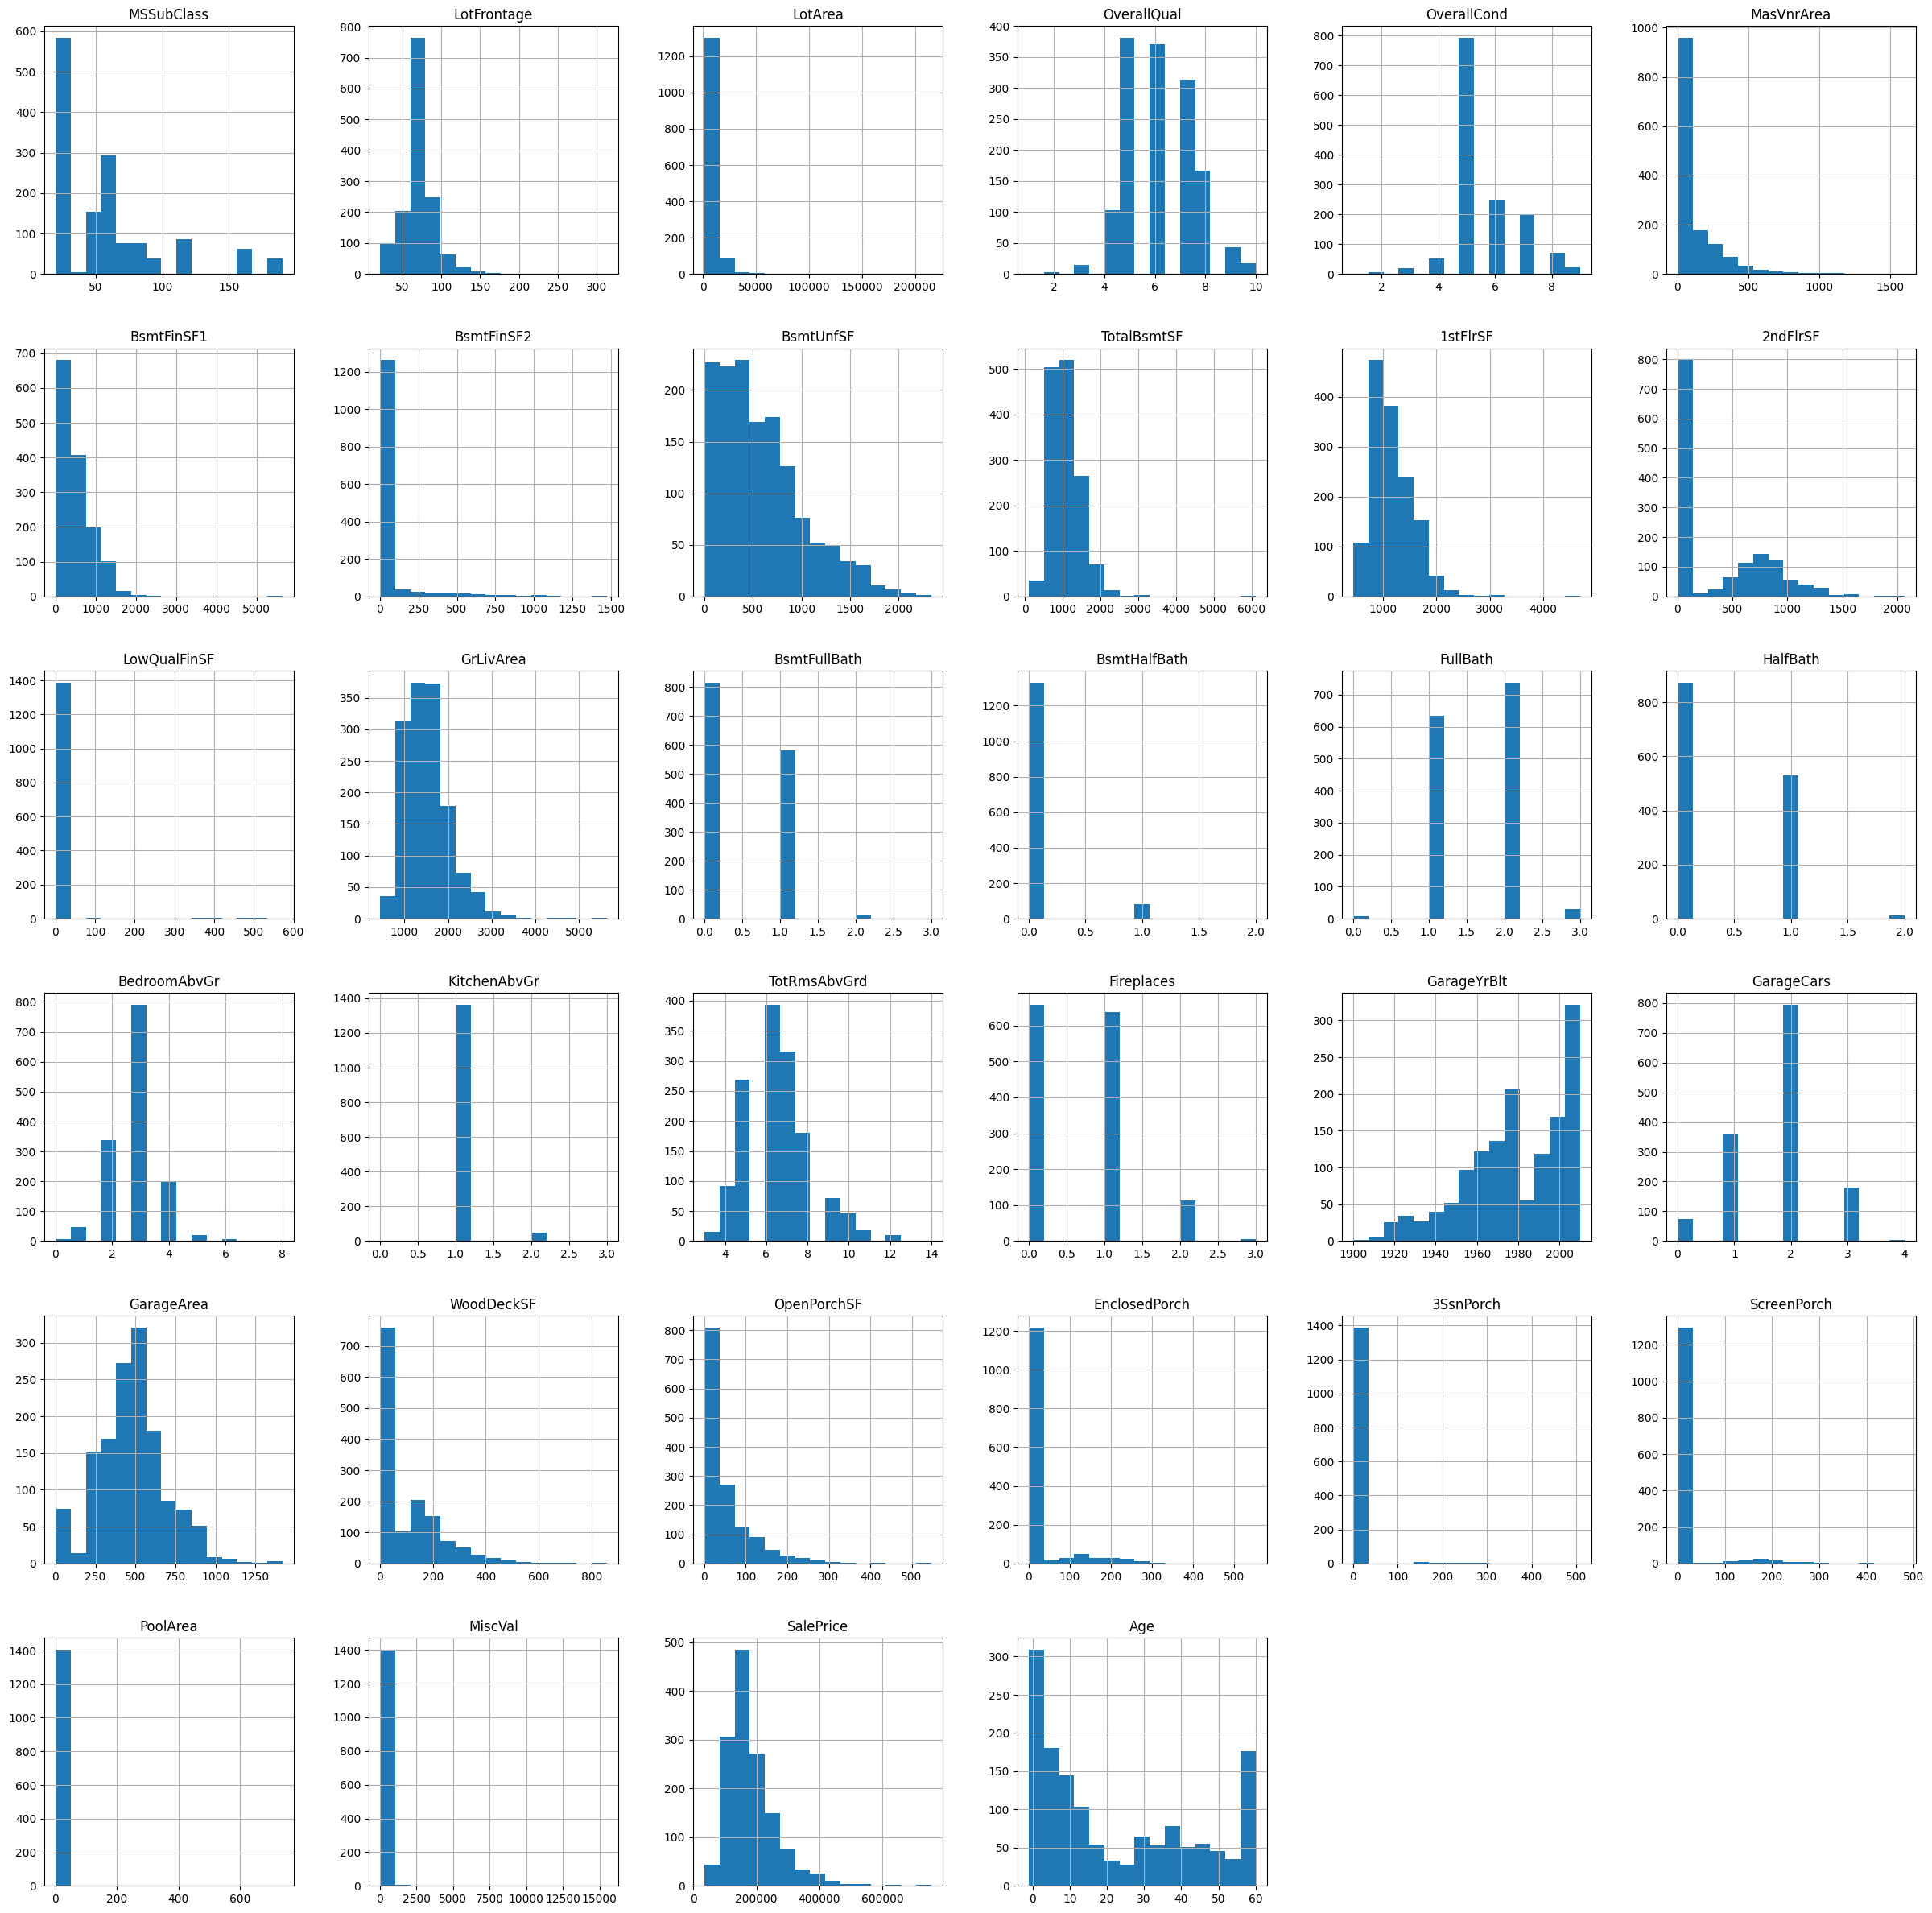

In [35]:
housing_zero_missing[numeric_df].hist(bins=15, figsize=(30, 30))
plt.show()

We see that few variables are highly skewed and there might be possiblity that they can be correlated with each other as well. This is very difficult to interpret from univairate analysis.¶


In [36]:
# correlation matrix
cor = housing_zero_missing[numeric_df].corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


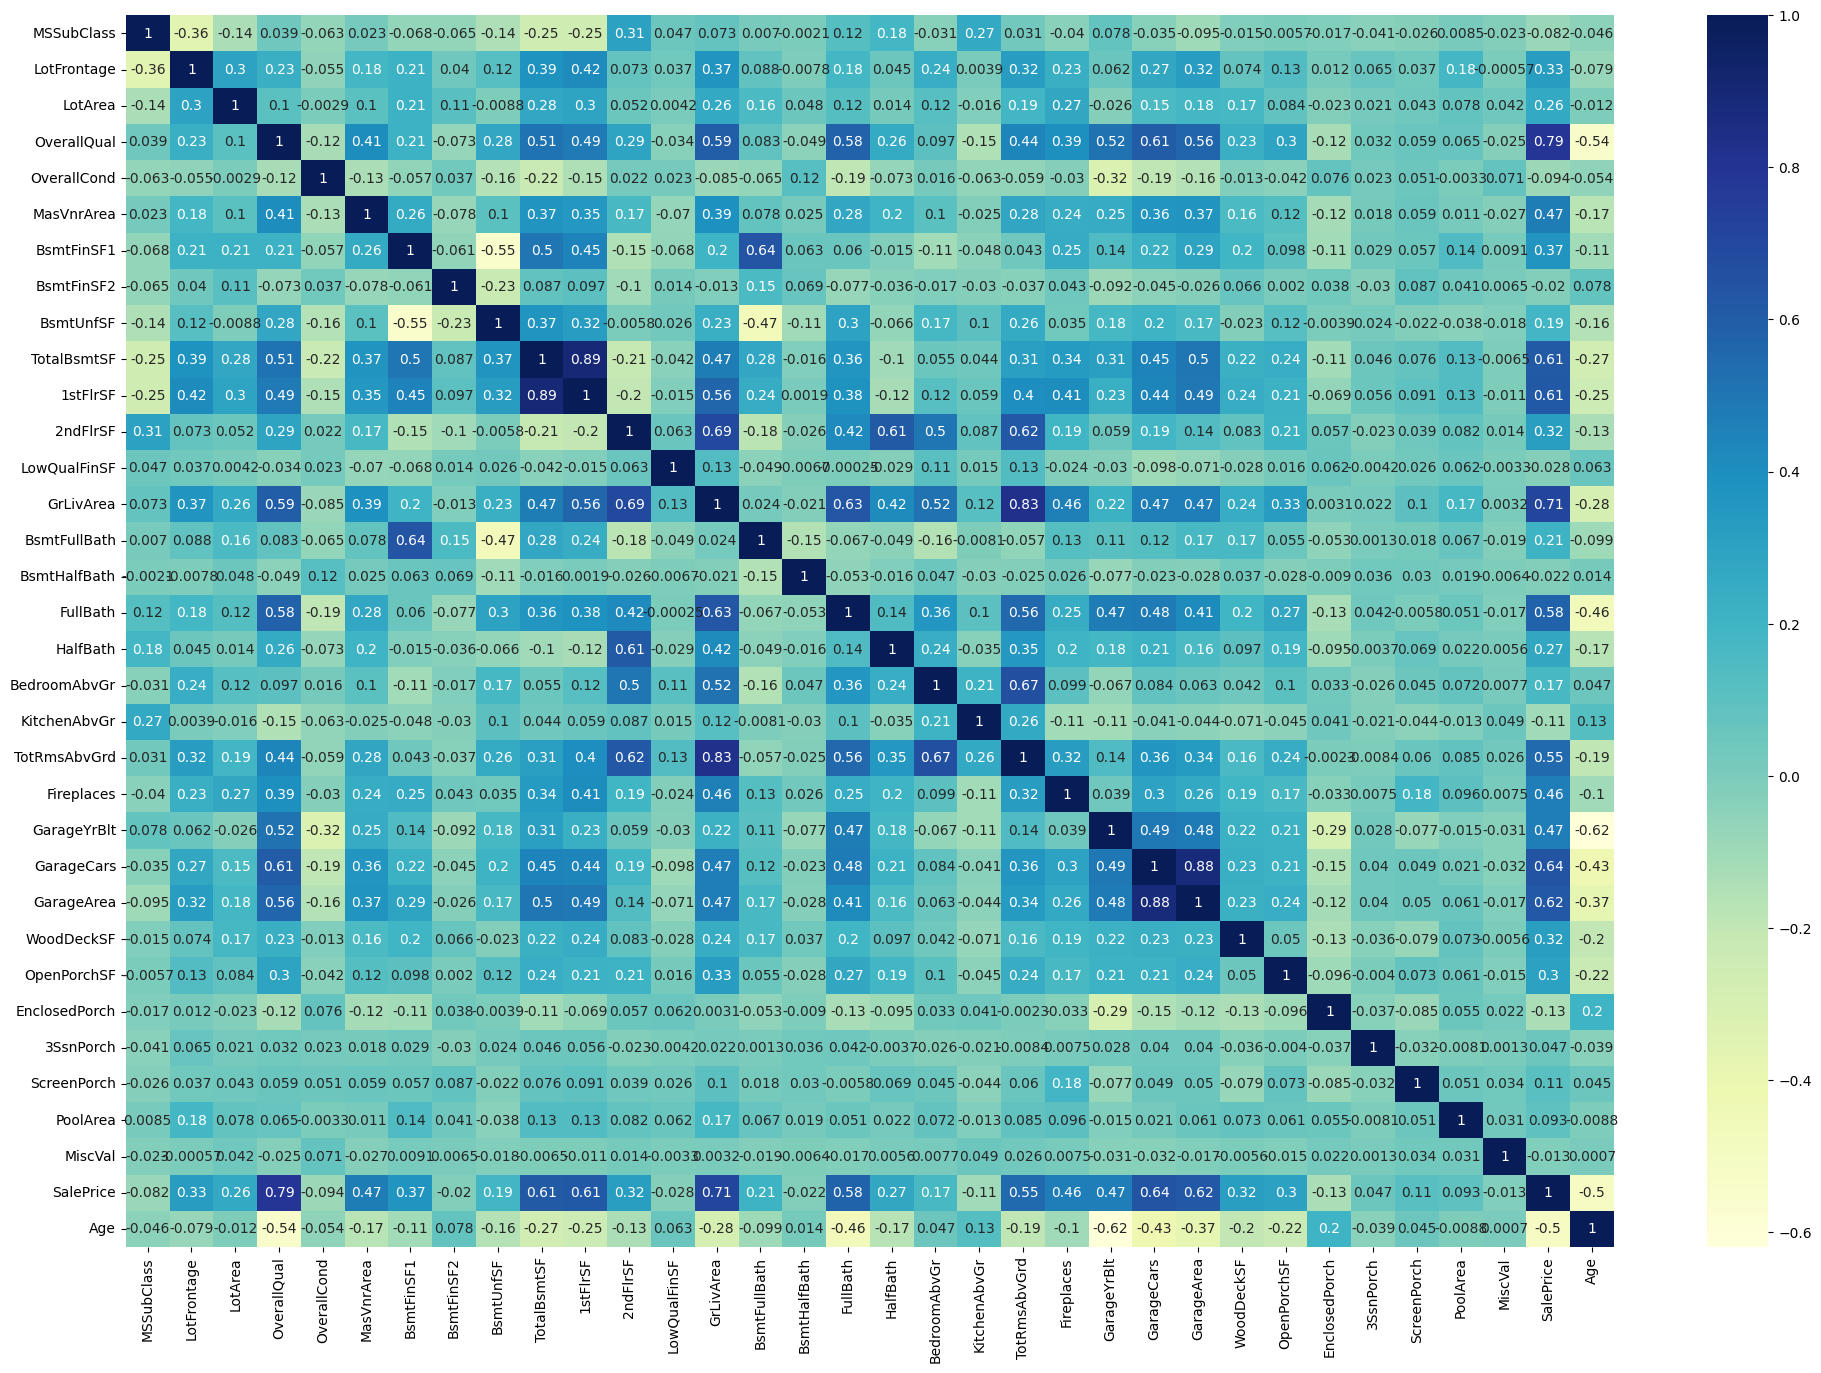

In [37]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Inferences: Based on the correlation we can make few following interpretions

- SalePrice is very high positively correlated to the Overall Quality(0.79)
- SalePrice is very high positively correlated to the 1stFlrSF (0.61)
- SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
- SalePrice is very high positively correlated to the GrLivArea (0.71)
- SalePrice is very high positively correlated to the FullBath(0.58)
- SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
- SalePrice is very high positively correlated to the GarageCars(0.64)
- SalePrice is very high positively correlated to the GarageAre(0.62)
- SalePrice is very high negatively correlated to the Age(-0.5)

The above variables are top ten correlated.¶


### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot¶


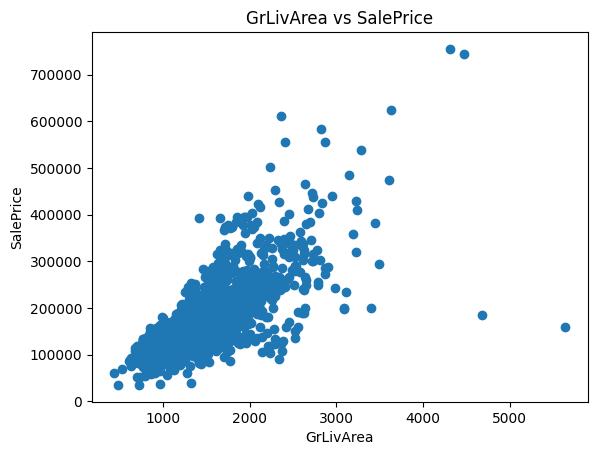

In [38]:
plt.scatter(housing_zero_missing.GrLivArea, housing_zero_missing.SalePrice)

plt.title('GrLivArea vs SalePrice')

plt.xlabel('GrLivArea')

plt.ylabel('SalePrice')

plt.show()

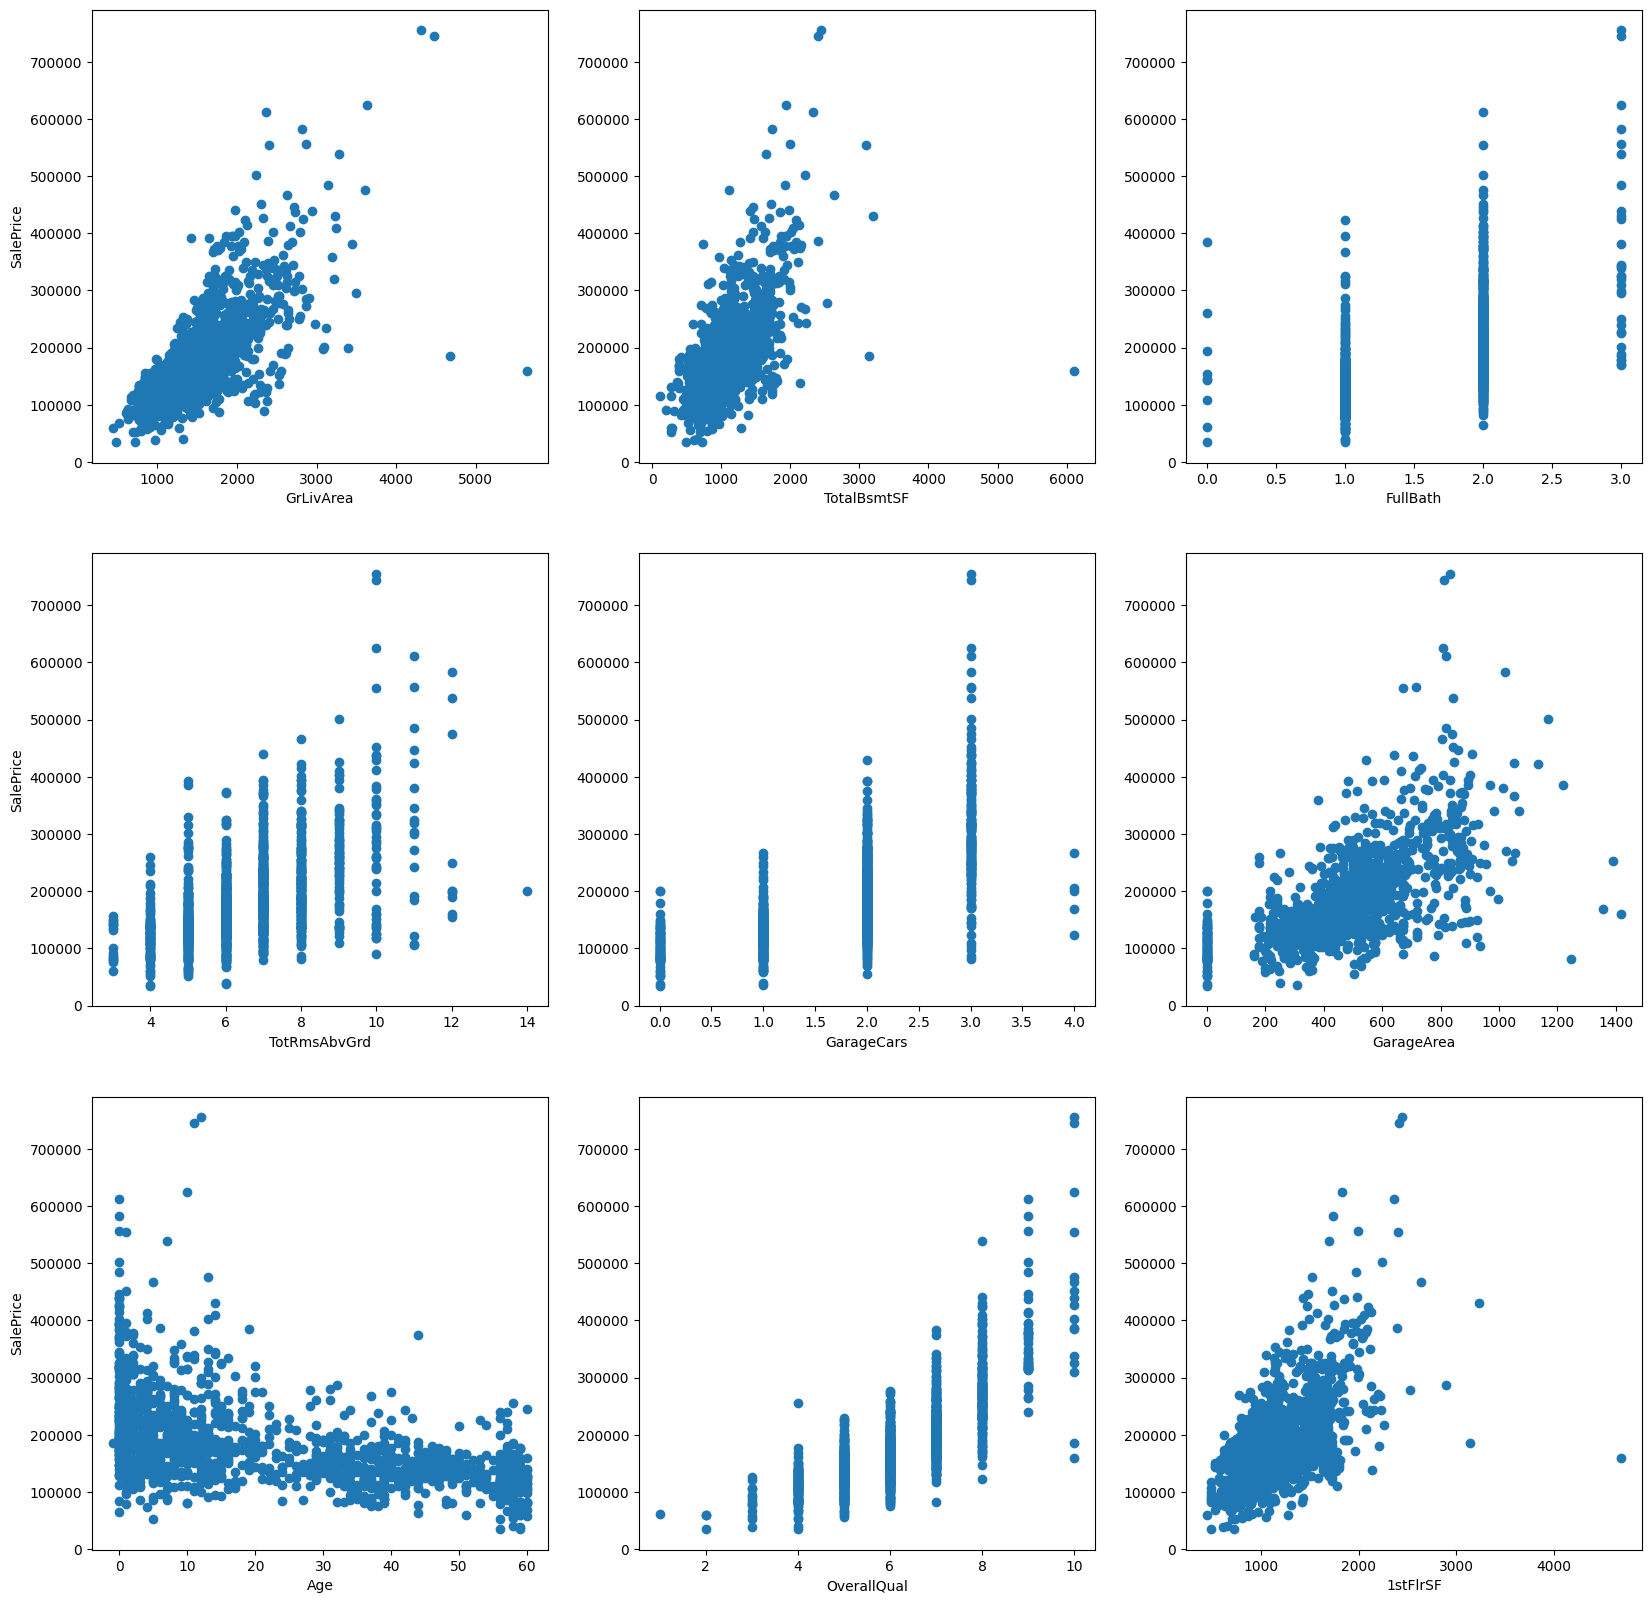

In [39]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
plt.scatter(housing_zero_missing.GrLivArea, housing_zero_missing.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,3,2)
plt.scatter(housing_zero_missing.TotalBsmtSF, housing_zero_missing.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,3,3)
plt.scatter(housing_zero_missing.FullBath, housing_zero_missing.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,3,4)
plt.scatter(housing_zero_missing.TotRmsAbvGrd, housing_zero_missing.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,3,5)
plt.scatter(housing_zero_missing.GarageCars, housing_zero_missing.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,3,6)
plt.scatter(housing_zero_missing.GarageArea, housing_zero_missing.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,3,7)
plt.scatter(housing_zero_missing.Age, housing_zero_missing.SalePrice)
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.subplot(3,3,8)
plt.scatter(housing_zero_missing.OverallQual, housing_zero_missing.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,3,9)
plt.scatter(housing_zero_missing['1stFlrSF'], housing_zero_missing.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Inferences :
- .
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to tr e characteriti
- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.cs.

### Categorical columns of our data set¶

In [40]:
cat_feats  = housing_zero_missing.dtypes[housing_zero_missing.dtypes == "object"].index
cat_feats  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

### EDA for few categorical columns- the columns which might be useful predicting the sale price(based on my understanding)¶


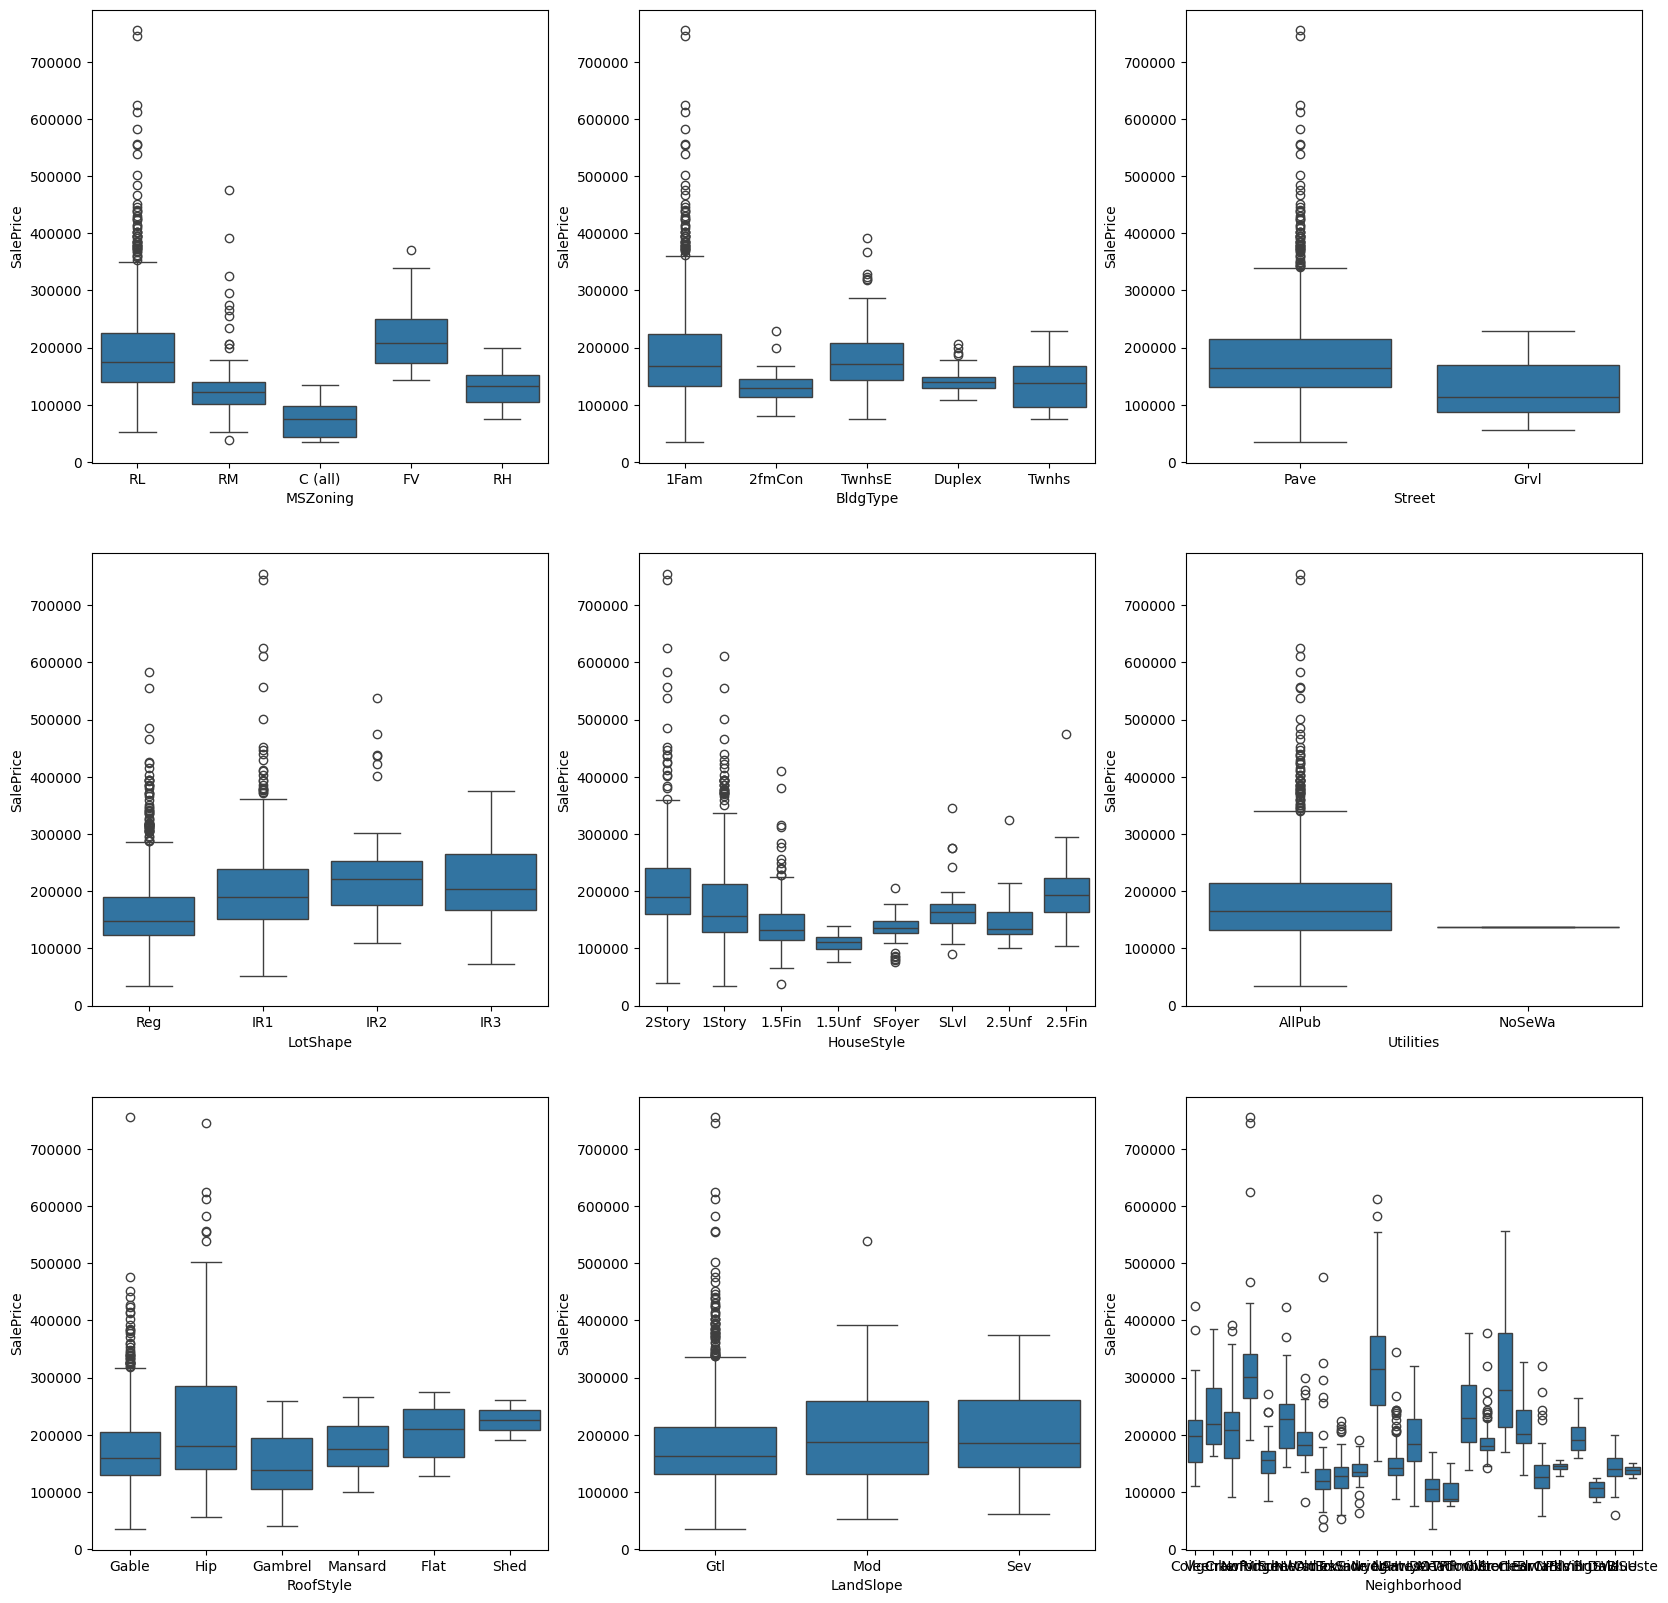

In [41]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=housing_zero_missing)
plt.show()

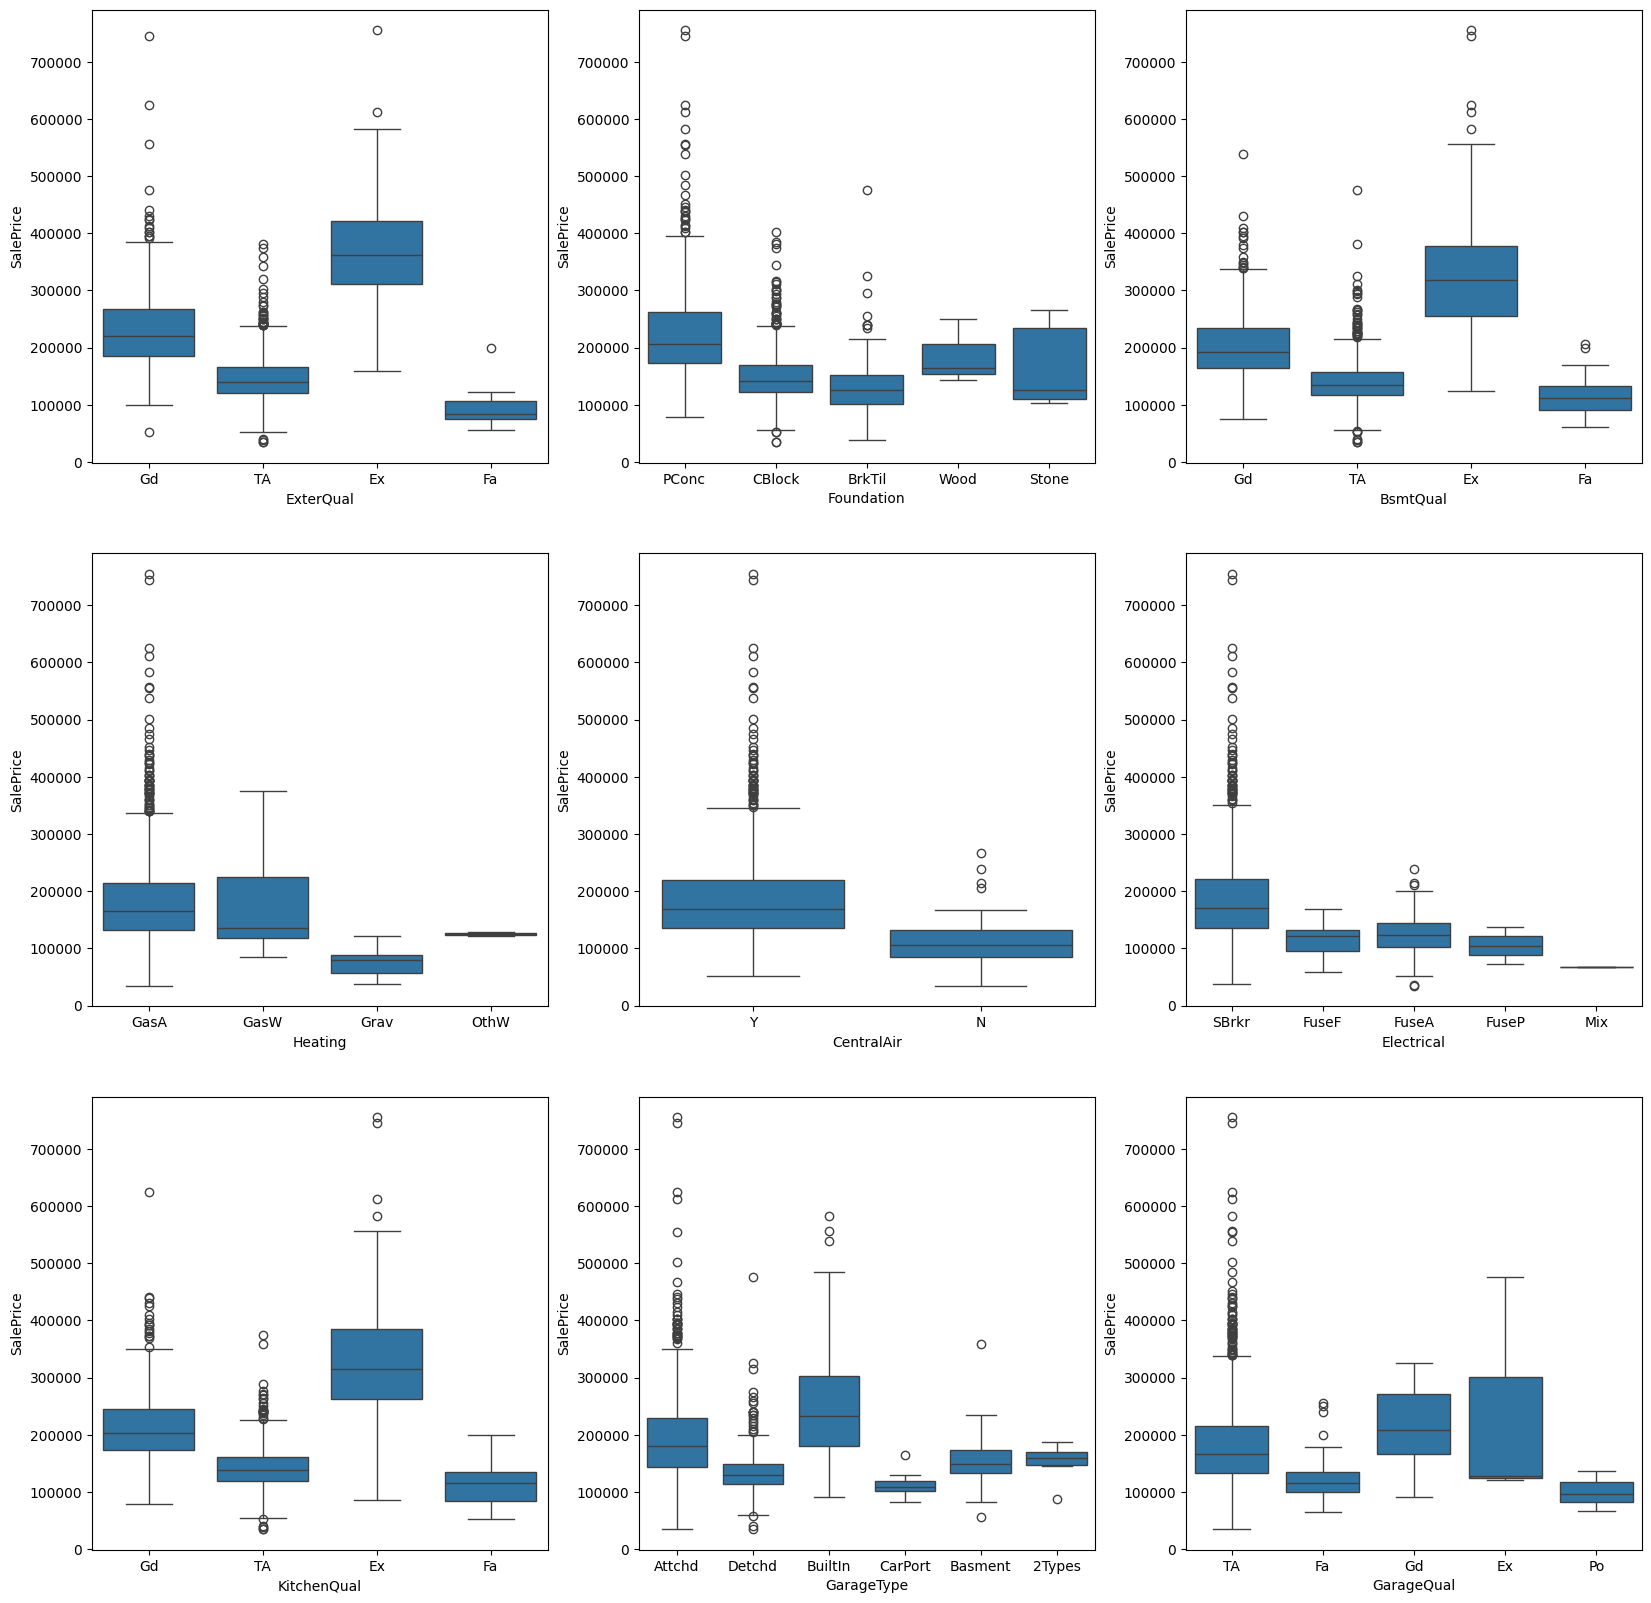

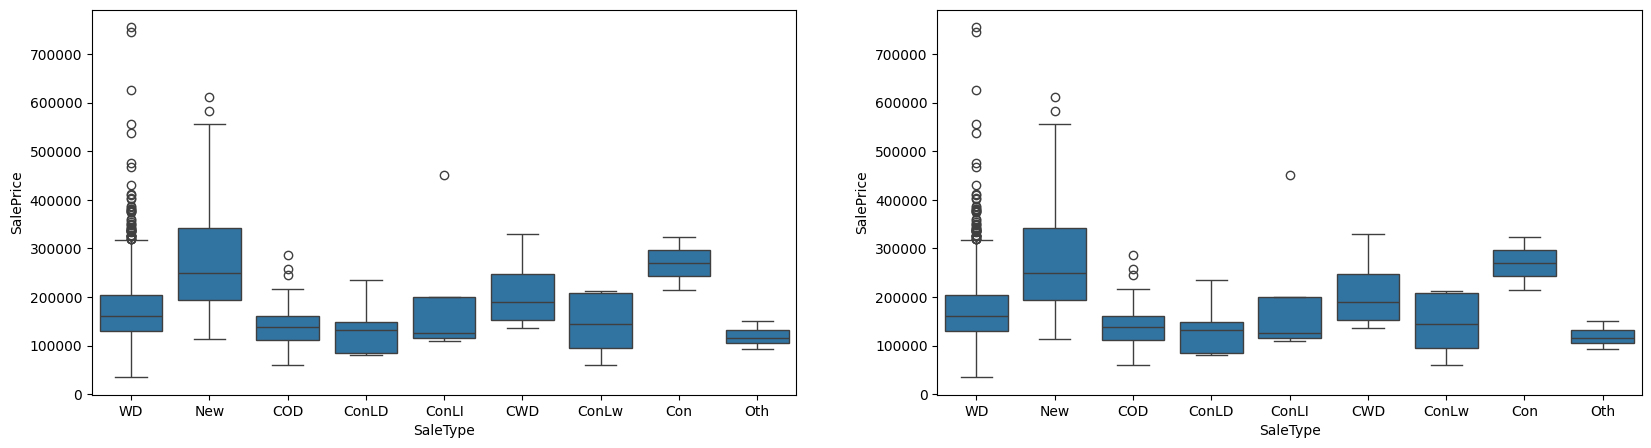

In [42]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=housing_zero_missing)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=housing_zero_missing)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=housing_zero_missing)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=housing_zero_missing)
plt.show()

Inferences -
-MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has more Sale Price when compared to 'Grvl' the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
- The house with Exterior Quality of type Execellent has the highest SalePrice.
- The house with Basement Quality of type Execellent has the highest SalePrice.
- The house with Kitchen Quality of type Execellent has the highest SalePrice.
- The house with Garage Quality of type Execellent has the highest SalePrice.
- The house with Garage Type of type BuiltIn has the highest SalePrice.
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more Sale Price when compared to 'No'

### Data Preprocessing - Tranforming the Target variable(SalePrice)

 ### Target variable¶

 SalePrice is the variable we need to predict. So let's do some analysis on this variable first.




In [43]:
housing_zero_missing.SalePrice.describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

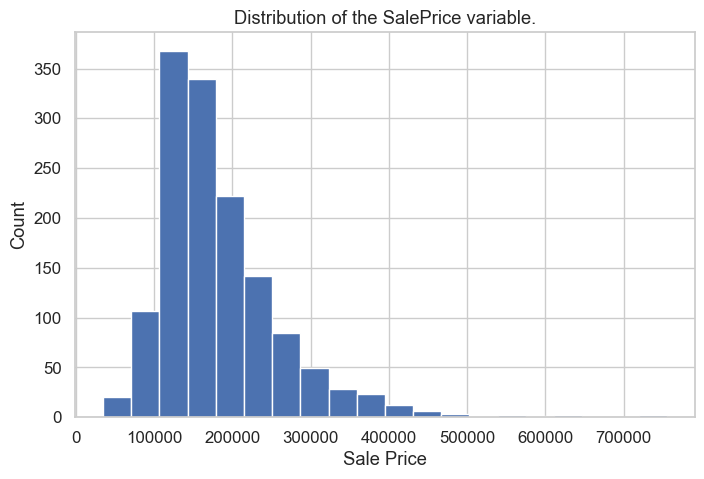

In [44]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(housing_zero_missing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 182507.02 and sigma = 79242.34



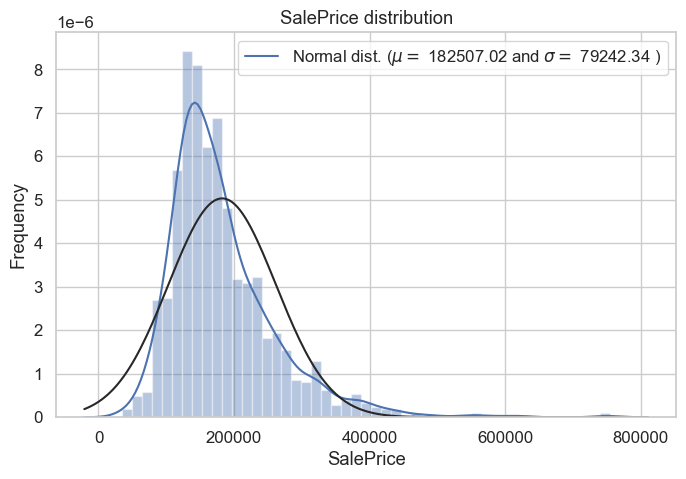

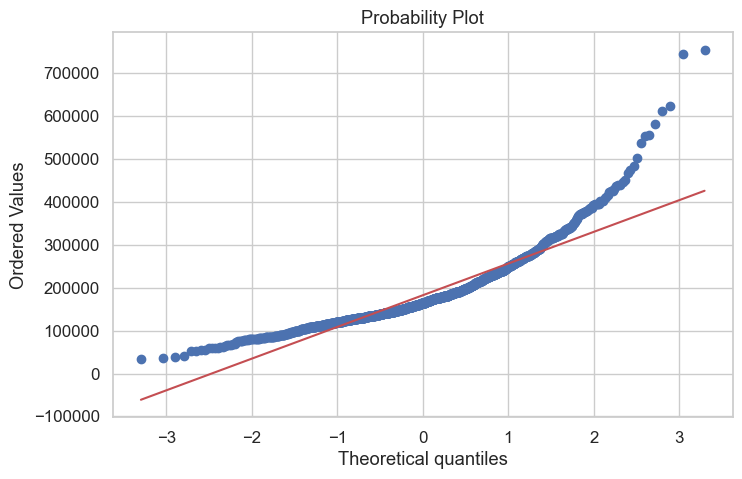

In [45]:

from scipy import stats

from scipy.stats import norm, skew
sns.distplot(housing_zero_missing['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(housing_zero_missing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(housing_zero_missing['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it normally distributed so using log tranformation method


### Log-transformation of the target variable



 mu = 12.03 and sigma = 0.39



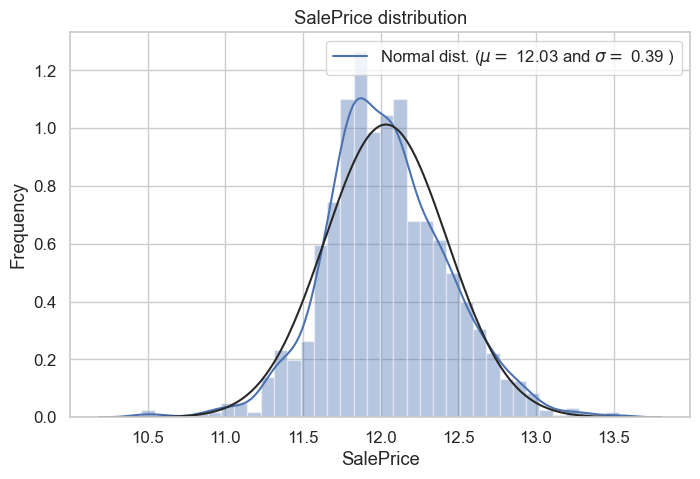

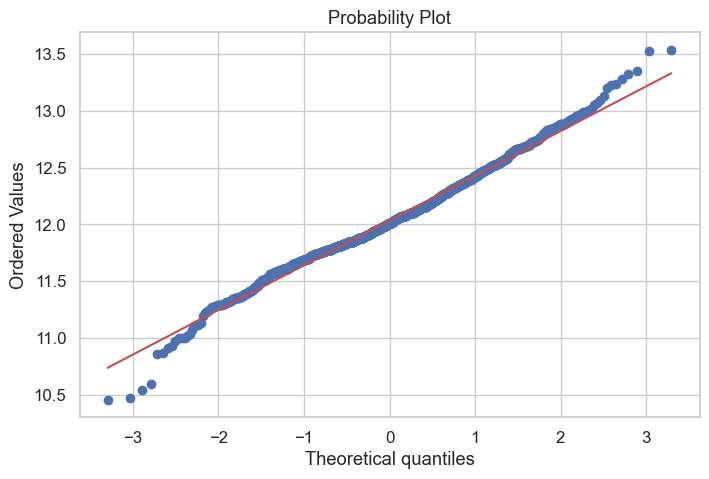

In [46]:
#We use the numpy function log to all elements of the column
housing_zero_missing["SalePrice"] = np.log(housing_zero_missing["SalePrice"])

#Checking the new distribution 
sns.distplot(housing_zero_missing['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(housing_zero_missing['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(housing_zero_missing['SalePrice'], plot=plt)
plt.show()


### Data Preprocessing - Label Encoding few categorical variables

### List of variables to map

In [47]:

# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in categorical columns. 
categ = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

for feat in categ:
    housing_zero_missing[feat] = label_encoder.fit_transform(housing_zero_missing[feat])

for feat in categ:
    print(housing_zero_missing[feat])


In [48]:
housing_zero_missing['CentralAir']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1412, dtype: int32

converting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [49]:
housing_zero_missing['MSSubClass']=housing_zero_missing['MSSubClass'].astype('object')
cat_feats  = housing_zero_missing.dtypes[housing_zero_missing.dtypes == "object"].index
cat_feats  

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
#Final check of missing values 
Total_missing = housing_zero_missing.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_zero_missing.isnull().sum()/housing_zero_missing.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
MSSubClass,0,0.0
HalfBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
FullBath,0,0.0
GarageYrBlt,0,0.0


## Data Preprocessing - Dummy creation for remaining categorical variables

In [51]:
# Creating dummies

dummy = pd.get_dummies(housing_zero_missing[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [52]:
# Adding the results back to the cleaned dataframe
housing_zero_missing = pd.concat([housing_zero_missing, dummy], axis=1)
housing_zero_missing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,False,False,False,True,False,False,False,True,False
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,False,True,False,False,False,True,False
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,False,False,True,False,False,False,False,False
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,False,False,False,True,False,False,False,True,False


In [53]:
# Dropping the columns whose dummies have been created
housing_zero_missing=housing_zero_missing.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [54]:
housing_zero_missing.shape

(1412, 199)

## Data Modeling -Test Train spliting

In [55]:
# model building - Test Train splitfrom sklearn.model_selection import train_test_split

np.random.seed(0)
house_train,house_test = train_test_split(housing_zero_missing, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 199)
(424, 199)


In [56]:
# display the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,2,4,0,3,1,...,False,False,False,False,True,False,False,False,True,False
211,83.0,10420,6,5,0.0,3,4,2,3,2,...,False,False,False,False,True,False,False,False,True,False
550,53.0,4043,6,6,0.0,3,4,2,3,3,...,False,False,False,False,False,False,False,False,False,False
640,62.0,12677,8,5,472.0,0,4,0,3,1,...,False,False,False,False,True,False,False,False,True,False
1113,66.0,8923,5,7,0.0,3,4,3,3,3,...,False,False,False,False,True,False,False,False,True,False


In [57]:
# display the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,4,2,3,3,...,False,False,False,False,True,False,False,False,True,False
512,70.0,9100,5,5,0.0,3,4,3,3,3,...,False,False,False,False,True,False,False,False,True,False
548,49.0,8235,5,7,0.0,3,2,3,3,3,...,False,False,False,False,True,False,False,False,True,False
546,70.0,8737,6,7,0.0,3,4,2,3,3,...,False,False,False,False,True,False,False,False,True,False
888,95.0,15865,8,6,0.0,2,2,3,1,1,...,False,False,False,False,True,False,False,False,True,False


In [58]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [59]:
y_test=house_test.pop('SalePrice')
X_test=house_test

### Data Modeling - Scaling


#### Scaling the numerical variables

In [60]:
#1. Instantiate a scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [61]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [62]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,1.0,0.000000,1.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
211,0.212329,0.042628,0.555556,0.500,0.000000,1.000000,1.0,0.666667,1.0,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,0.109589,0.012821,0.555556,0.625,0.000000,1.000000,1.0,0.666667,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.418069,0.000000,1.0,0.000000,1.0,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1113,0.154110,0.035631,0.444444,0.750,0.000000,1.000000,1.0,1.000000,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [63]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.848516,0.931680,0.759784,0.937922,0.754049,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.225811,0.185979,0.284086,0.217891,0.385646,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.666667,1.000000,0.666667,1.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [64]:
# verifying the y_train to check if it has only SalePrice
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

### Data Modeling - Recursive Feature Elimination (RFE) E Technique

In [65]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.35728431e-01  5.44763084e-01  3.90310732e-01  2.34640461e-01
  2.91598658e-02 -2.76848282e-02  4.97457981e-03 -2.48334917e-02
  2.23212740e-02 -1.60562007e-02 -1.17405519e-02 -4.45912222e+09
  7.24472795e-03 -3.13585217e+09 -4.96970874e+09  6.58443859e+09
 -2.89322900e-02  8.33940924e-02  1.00006799e+11  7.40193692e+10
  2.05031860e+10 -1.44741023e+11  8.55427261e-02 -4.28864037e-03
  9.03843401e-02  5.14162103e-02 -4.19529305e-02 -1.41077856e-01
 -4.77064278e-02  2.72351021e-02  3.98132278e-02  7.55839760e-02
  2.98588833e-02 -2.18954086e-02  1.32949829e-01  9.42459106e-02
 -2.58083344e-02  2.68106461e-02 -6.06536865e-04  6.08367920e-02
  2.25868225e-02  1.95350647e-02  4.27799225e-02  1.02525711e-01
  9.84017849e-02 -2.45513916e-02 -3.92379761e-02 -8.29467773e-02
  3.63564491e-02 -3.11269760e-01 -4.36172485e-02 -5.41868210e-02
 -4.77714539e-02 -1.65346146e-01 -1.60791397e-01 -6.57920837e-02
 -2.08831637e+09 -6.40974045e-02 -1.49398804e-01 -1.18537903e-01
 -6.38198853e-02  4.99580

In [67]:

rfe = RFE(lm, n_features_to_select=90, step=1)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True False  True False False False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True False  True  True False False  True  True False False  True  True
 False False False  True False False False  True  True False  True  True
 False  True False False False  True  True False  True False  True False
 False  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True  True False False  True False False False False False  True  True
 False False False False  True False  True False  True False False False
 False False  True  True  True  True  True  True  True  True False  True
 False False  True False False  True False False  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False  True False  True
 False  True False False False False False False  T

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
       'Age', 'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_

In [69]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath', 'HalfBath',
       ...
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Partial'],
      dtype='object', length=108)

In [70]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [71]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Heating_Grav,Heating_OthW,Electrical_Mix,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,1.0,0.160959,0.228895,0.888889,0.500,0.666667,0.863550,0.0,0.013699,0.561228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,1.0,0.212329,0.042628,0.555556,0.500,1.000000,0.017176,0.0,0.503425,0.357674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,1.0,0.109589,0.012821,0.555556,0.625,1.000000,0.266698,0.0,0.218322,0.311470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.140411,0.053177,0.777778,0.500,0.000000,0.581107,0.0,0.128425,0.456543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,1.0,0.154110,0.035631,0.444444,0.750,1.000000,0.306775,0.0,0.156250,0.291761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        18:20:28   Log-Likelihood:                 874.99
No. Observations:                 988   AIC:                            -1584.
Df Residuals:                     905   BIC:                            -1178.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.8481 

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.65
2,LotArea,1.99
3,OverallQual,3.79
4,OverallCond,1.78
5,ExterQual,2.48
6,BsmtFinSF1,inf
7,BsmtFinSF2,inf
8,BsmtUnfSF,inf
9,TotalBsmtSF,inf


#### The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.¶

#### Though the accuracy the good it has many features and highly collinear.¶



In [74]:
# Deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [75]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,Heating_Grav,Heating_OthW,Electrical_Mix,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,0.160959,0.228895,0.888889,0.500,0.666667,0.863550,0.0,0.013699,0.561228,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
211,0.212329,0.042628,0.555556,0.500,1.000000,0.017176,0.0,0.503425,0.357674,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
550,0.109589,0.012821,0.555556,0.625,1.000000,0.266698,0.0,0.218322,0.311470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.140411,0.053177,0.777778,0.500,0.000000,0.581107,0.0,0.128425,0.456543,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1113,0.154110,0.035631,0.444444,0.750,1.000000,0.306775,0.0,0.156250,0.291761,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,1.000000,0.374046,0.0,0.000000,0.219386,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,0.270548,0.041483,0.555556,0.500,1.000000,0.233779,0.0,0.400257,0.426494,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
360,0.164384,0.029166,0.555556,0.625,1.000000,0.368798,0.0,0.049229,0.252989,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,0.037671,0.014957,0.555556,0.500,1.000000,0.572996,0.0,0.015411,0.365751,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Data Modeling - Advanced Regression

Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

### Ridge Regression model¶


In [76]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.93509912517157


Performing Cross score validation and using different values of alpha and finding the optimal paramater

In [77]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023438,0.012782,0.005090,1.905140e-03,0.001,{'alpha': 0.001},-0.080659,-0.081046,-0.086129,-0.079875,...,-0.082114,0.002234,4,-0.070581,-0.071384,-0.069216,-0.072222,-0.070188,-0.070718,0.001026
1,0.008679,0.002778,0.003397,7.962564e-04,0.01,{'alpha': 0.01},-0.080571,-0.081024,-0.086059,-0.079795,...,-0.082013,0.002223,3,-0.070610,-0.071411,-0.069248,-0.072274,-0.070244,-0.070757,0.001029
2,0.009773,0.003177,0.003798,3.856428e-04,0.5,{'alpha': 0.5},-0.079302,-0.081611,-0.085051,-0.076059,...,-0.080948,0.003067,1,-0.072458,-0.072914,-0.070831,-0.074315,-0.071807,-0.072465,0.001160
3,0.022498,0.016960,0.003998,6.204853e-04,1.0,{'alpha': 1.0},-0.079339,-0.082780,-0.085793,-0.075211,...,-0.081201,0.003626,2,-0.073770,-0.073917,-0.072116,-0.075621,-0.072876,-0.073660,0.001177
4,0.012661,0.010939,0.003199,3.951538e-04,10.0,{'alpha': 10.0},-0.086678,-0.096529,-0.093442,-0.078469,...,-0.089242,0.006274,5,-0.085329,-0.083373,-0.083559,-0.086276,-0.084395,-0.084587,0.001093
5,0.012169,0.004943,0.003802,3.774656e-04,50,{'alpha': 50},-0.118839,-0.121108,-0.118705,-0.100494,...,-0.116144,0.007910,6,-0.114378,-0.111871,-0.112826,-0.114692,-0.112524,-0.113258,0.001092
6,0.011563,0.008688,0.003803,4.056911e-04,100,{'alpha': 100},-0.144143,-0.142036,-0.141609,-0.119886,...,-0.138621,0.009470,7,-0.137040,-0.135554,-0.135831,-0.138232,-0.135217,-0.136375,0.001114
7,0.006982,0.000630,0.003398,4.832467e-04,500,{'alpha': 500},-0.220477,-0.215184,-0.218251,-0.187460,...,-0.212362,0.012600,8,-0.209795,-0.210920,-0.209623,-0.214019,-0.210210,-0.210913,0.001616
8,0.007181,0.000399,0.002992,9.725608e-07,1000,{'alpha': 1000},-0.253759,-0.248488,-0.249751,-0.221133,...,-0.245412,0.012329,9,-0.242704,-0.243918,-0.243553,-0.247826,-0.243338,-0.244268,0.001822


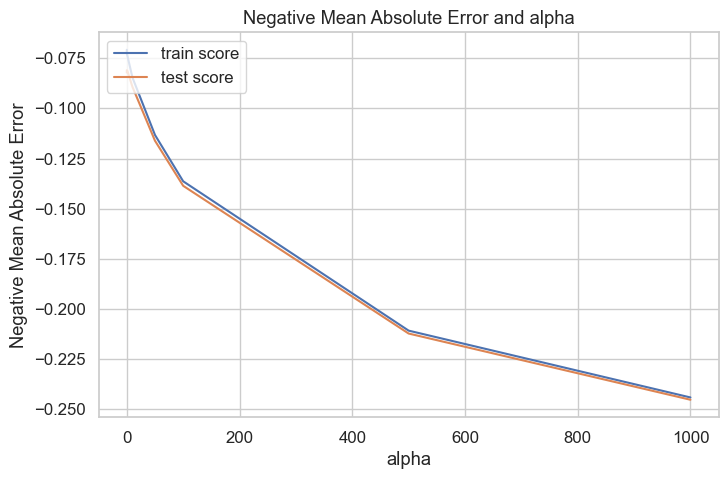

In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that alpha is somewhere between 0- 20 So sleting parameters according to that.



In [80]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

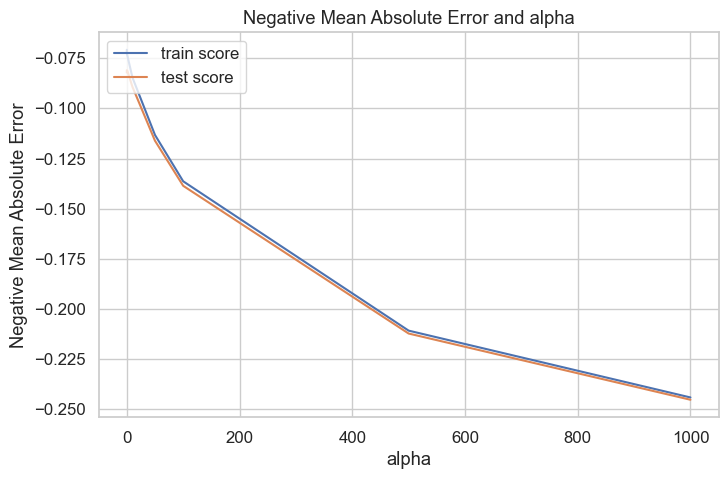

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2

In [82]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


#### Building ridge regression model with optimal alpha value¶

In [83]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [84]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [85]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.546879,10.546879
3,OverallCond,0.465070,0.465070
14,BsmtUnfSF,0.373421,0.373421
12,BsmtFinType2,0.329086,0.329086
2,OverallQual,0.321474,0.321474
11,BsmtFinSF1,0.298175,0.298175
9,BsmtExposure,0.293271,0.293271
33,GarageFinish,0.292276,0.292276
6,ExterCond,0.253987,0.253987
72,Utilities_NoSeWa,-0.252962,0.252962


In [86]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9314
Ridge regression test r2:  0.751


## Lasso Regression model

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049630,0.015306,0.003795,0.000418,0.0001,{'alpha': 0.0001},-0.079853,-0.081414,-0.084415,-0.077598,...,-0.081085,0.002280,1,-0.072613,-0.073315,-0.071054,-0.074914,-0.072194,-0.072818,0.001279
1,0.009189,0.000410,0.003367,0.000496,0.001,{'alpha': 0.001},-0.084437,-0.088986,-0.091352,-0.075778,...,-0.085082,0.005321,2,-0.081287,-0.080517,-0.080662,-0.083468,-0.080792,-0.081345,0.001092
2,0.006985,0.000896,0.003186,0.000403,0.01,{'alpha': 0.01},-0.124778,-0.125531,-0.127410,-0.107216,...,-0.121990,0.007444,3,-0.122819,-0.120001,-0.119377,-0.121117,-0.118161,-0.120295,0.001583
3,0.007695,0.001544,0.003784,0.001186,0.05,{'alpha': 0.05},-0.264014,-0.251045,-0.258816,-0.230422,...,-0.256763,0.016132,4,-0.251680,-0.256076,-0.251752,-0.255764,-0.255101,-0.254075,0.001951
4,0.007500,0.000630,0.004174,0.000758,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


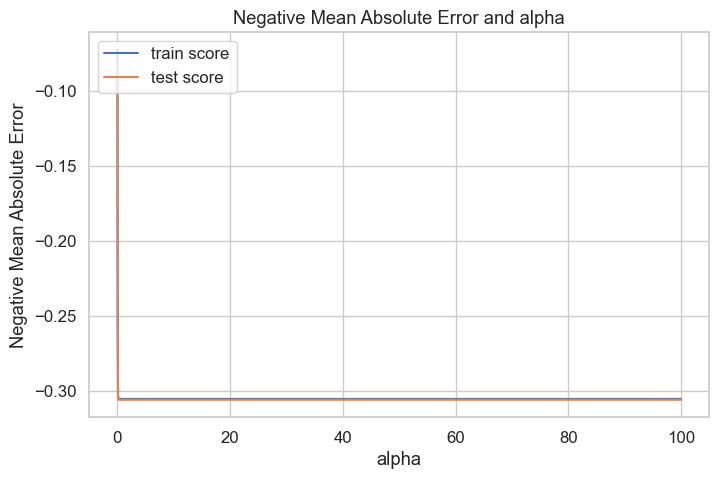

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graphs shows that alpha value might be very less than 1

In [90]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013095,0.001257,0.004383,0.000814,0.001,{'alpha': 0.001},-0.084437,-0.088986,-0.091352,-0.075778,...,-0.085082,0.005321,1,-0.081287,-0.080517,-0.080662,-0.083468,-0.080792,-0.081345,0.001092
1,0.008880,0.001125,0.003585,0.000498,0.01,{'alpha': 0.01},-0.124778,-0.125531,-0.127410,-0.107216,...,-0.121990,0.007444,2,-0.122819,-0.120001,-0.119377,-0.121117,-0.118161,-0.120295,0.001583
2,0.008398,0.001015,0.003975,0.000015,0.05,{'alpha': 0.05},-0.264014,-0.251045,-0.258816,-0.230422,...,-0.256763,0.016132,3,-0.251680,-0.256076,-0.251752,-0.255764,-0.255101,-0.254075,0.001951
3,0.007182,0.000737,0.003799,0.000421,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,4,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526
4,0.006403,0.000500,0.003088,0.000208,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


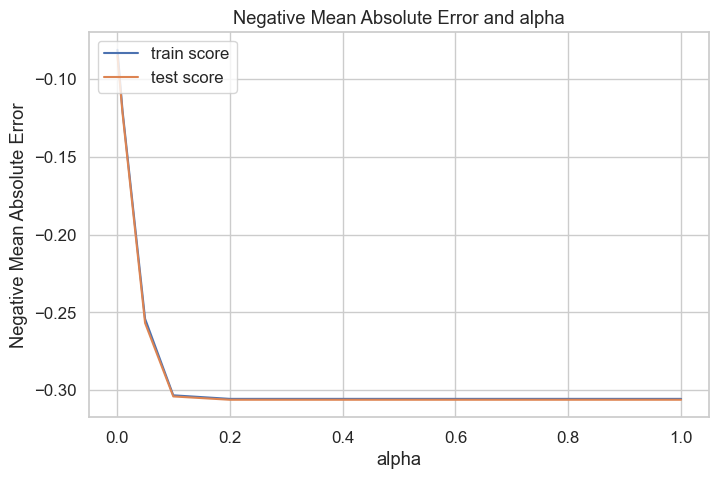

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

Tunning it more

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041858,0.010161,0.003790,0.000746,0.0001,{'alpha': 0.0001},-0.079853,-0.081414,-0.084415,-0.077598,...,-0.081085,0.002280,1,-0.072613,-0.073315,-0.071054,-0.074914,-0.072194,-0.072818,0.001279
1,0.010299,0.000983,0.003570,0.000502,0.001,{'alpha': 0.001},-0.084437,-0.088986,-0.091352,-0.075778,...,-0.085082,0.005321,2,-0.081287,-0.080517,-0.080662,-0.083468,-0.080792,-0.081345,0.001092
2,0.006973,0.000634,0.003196,0.000399,0.01,{'alpha': 0.01},-0.124778,-0.125531,-0.127410,-0.107216,...,-0.121990,0.007444,3,-0.122819,-0.120001,-0.119377,-0.121117,-0.118161,-0.120295,0.001583
3,0.006815,0.000746,0.003498,0.000613,0.05,{'alpha': 0.05},-0.264014,-0.251045,-0.258816,-0.230422,...,-0.256763,0.016132,4,-0.251680,-0.256076,-0.251752,-0.255764,-0.255101,-0.254075,0.001951
4,0.006795,0.000733,0.003251,0.000399,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


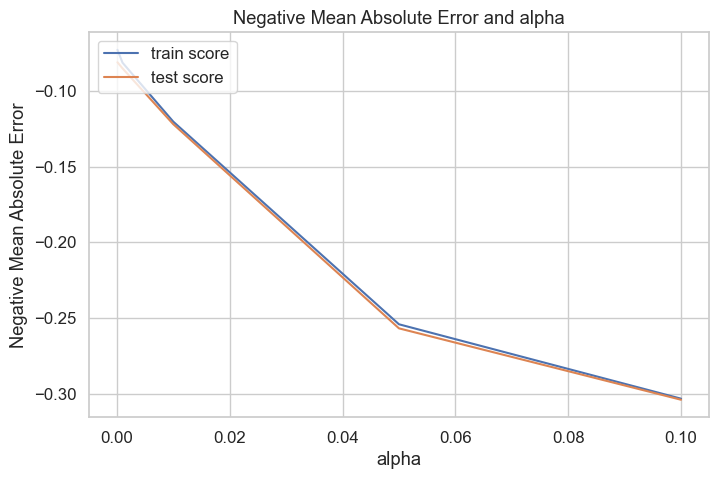

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

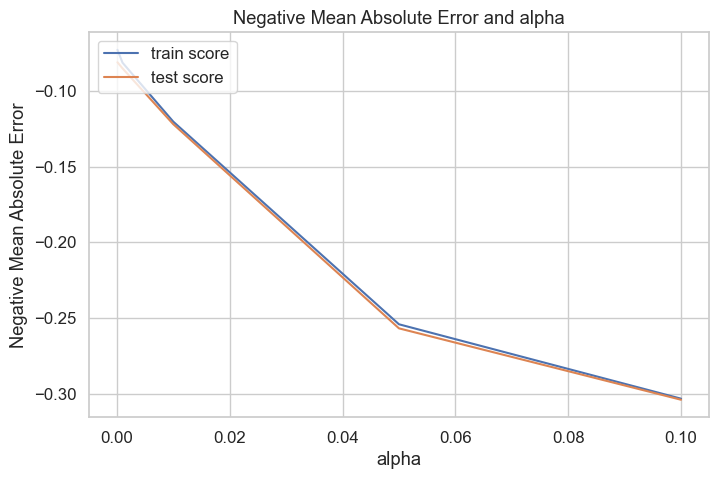

In [99]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [100]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [101]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.041644,0.007804,0.003786,0.000756,0.00001,{'alpha': 1e-05},-0.080525,-0.080740,-0.085891,-0.079883,...,-0.081865,0.002162,2,-0.070755,-0.071484,-0.069349,-0.072522,-0.070353,-0.070892,0.001068
1,0.036457,0.005753,0.003775,0.000396,0.0001,{'alpha': 0.0001},-0.079853,-0.081414,-0.084415,-0.077598,...,-0.081085,0.002280,1,-0.072613,-0.073315,-0.071054,-0.074914,-0.072194,-0.072818,0.001279
2,0.010783,0.000741,0.003823,0.000318,0.001,{'alpha': 0.001},-0.084437,-0.088986,-0.091352,-0.075778,...,-0.085082,0.005321,3,-0.081287,-0.080517,-0.080662,-0.083468,-0.080792,-0.081345,0.001092


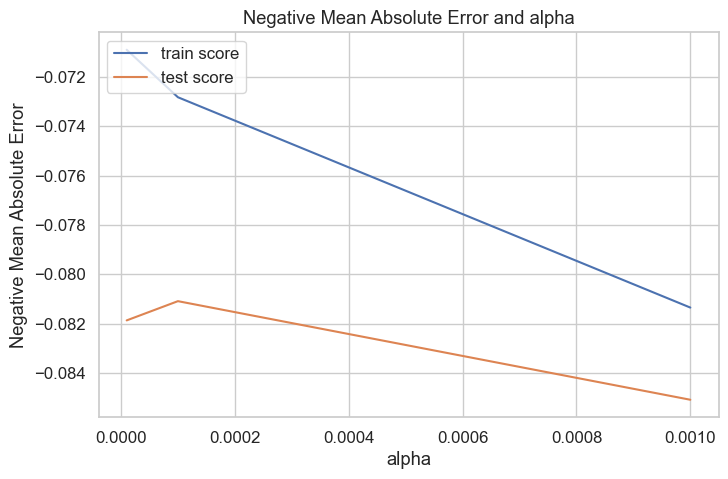

In [103]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

### Building Lasso regression model with optimal alpha value¶

In [105]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9323420160250464
Lasso Regression test r2: 0.7429374462408751


In [106]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [107]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.461971,10.461971
1,LotArea,0.205023,0.205023
2,OverallQual,0.457002,0.457002
3,OverallCond,0.508333,0.508333
4,ExterQual,0.213749,0.213749
5,BsmtFinSF1,-0.089206,0.089206
6,BsmtFinSF2,0.165824,0.165824
7,BsmtUnfSF,0.028907,0.028907
8,TotalBsmtSF,-0.000000,0.000000
9,CentralAir,0.455768,0.455768


In [108]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.461971,10.461971
14,BsmtFullBath,0.689951,0.689951
3,OverallCond,0.508333,0.508333
2,OverallQual,0.457002,0.457002
9,CentralAir,0.455768,0.455768
72,Exterior1st_CBlock,-0.446563,0.446563
33,MSZoning_RH,0.370853,0.370853
35,MSZoning_RM,0.309919,0.309919
36,Street_Pave,0.253857,0.253857
34,MSZoning_RL,0.240699,0.240699


In [109]:
lasso.coef_


array([ 2.05022812e-01,  4.57001855e-01,  5.08332781e-01,  2.13748522e-01,
       -8.92055178e-02,  1.65824153e-01,  2.89073572e-02, -0.00000000e+00,
        4.55767769e-01,  9.65181894e-02,  9.75482461e-02,  1.89679572e-01,
       -3.17018313e-02,  6.89950532e-01,  7.51431654e-02,  6.19486718e-02,
       -6.63920597e-02, -1.43225218e-01,  6.28860256e-02,  8.81855656e-02,
        1.55209322e-01,  1.00490661e-01,  6.43289250e-02,  7.54237758e-02,
        5.27935465e-02, -8.76000467e-02, -5.94457351e-02, -3.57857513e-02,
       -3.89685100e-02, -3.00141750e-02,  6.93912951e-03, -7.77400032e-02,
        3.70853319e-01,  2.40699060e-01,  3.09919157e-01,  2.53857286e-01,
        1.09787087e-01, -0.00000000e+00, -6.25671394e-02, -6.73878219e-02,
        8.60023675e-02, -4.57760785e-02, -9.81926496e-02,  4.85074224e-02,
       -7.23489777e-02,  9.44235950e-02,  7.48500188e-02,  4.64671386e-02,
        3.12582241e-02,  5.27507576e-02,  4.06985213e-03,  0.00000000e+00,
        0.00000000e+00,  

## Data Modeling and evaluation - Final model

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model

In [110]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9323420160250464
0.7429374462408751


## Model Inference and Conclusion

**The company wants to know:**
1. Which variables are significant in predicting the price of a house:

- **LotFrontage** : If the house Linear feet of street connected to property area increase then the Price increase.
- **BsmtFullBath** : : If the BsmtFullBath area is more the SalePrice is higher
- **Overall Condition**: If the Overall Condition is Excellent the SalePrice is higher
- **MSZoning_RH** : If the house i near residential area then the SalePrice is higher
- **Overall quality**: If the Overall Condition is Excellent the SalePrice is higher
- **Exterior1st_CBlock** : IF the house Exterior1st is CBlock then price is less.
- **Garage Area**: If the Garage area is high the SalePrice is higher
- **CentralAir**: If the CentralAir is Yes the SalePrice is higher

2. How well those variables describe the price of a house.

- These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future

### Optimal value of alpha:¶
- For Ridge regression : **1.0**
- For Lasso Regression : **0.0001**

For Ridge regression aplha is 1.0 and now doubling it and making it 2.0

In [111]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [112]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(5)

,Features,Coefficient,Mod
0,LotFrontage,10.546879,10.546879
3,OverallCond,0.465070,0.465070
14,BsmtUnfSF,0.373421,0.373421
12,BsmtFinType2,0.329086,0.329086
2,OverallQual,0.321474,0.321474


In [113]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.9282629783558803
Ridge Regression test r2: 0.7594603751052141


For Lasso regression alpha is 0.0001 and not doubling it and making it 0.0002

In [114]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.0002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [115]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9291745534532508
Lasso Regression test r2: 0.7521980443514142


In [116]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [127]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,OverallQual,10.591782,10.591782
9,BsmtFullBath,0.798570,0.798570
1,BsmtFinSF1,0.576720,0.576720
67,Exterior1st_CBlock,-0.485794,0.485794
5,1stFlrSF,0.435076,0.435076
28,MSZoning_RH,0.414641,0.414641
30,MSZoning_RM,0.359640,0.359640
31,Street_Pave,0.295786,0.295786
29,MSZoning_RL,0.256280,0.256280
76,Heating_OthW,-0.219356,0.219356


Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Droping the first five important predictors

In [130]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape

(988, 85)

In [131]:
X_test_new.shape

(424, 85)

In [132]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127584,0.170900,0.024878,0.041988,0.0001,{'alpha': 0.0001},-0.096230,-0.094756,-0.092168,-0.089827,...,-0.093008,0.002243,1,-0.080988,-0.082465,-0.082070,-0.085117,-0.083130,-0.082754,0.001371
1,0.008287,0.000877,0.003192,0.000399,0.001,{'alpha': 0.001},-0.099156,-0.107434,-0.096802,-0.086803,...,-0.097956,0.006628,2,-0.091669,-0.092228,-0.093483,-0.094895,-0.092593,-0.092974,0.001127
2,0.005999,0.000017,0.002991,0.000032,0.01,{'alpha': 0.01},-0.133233,-0.140583,-0.137120,-0.123202,...,-0.133971,0.005885,3,-0.134266,-0.130080,-0.132028,-0.132973,-0.129059,-0.131681,0.001893


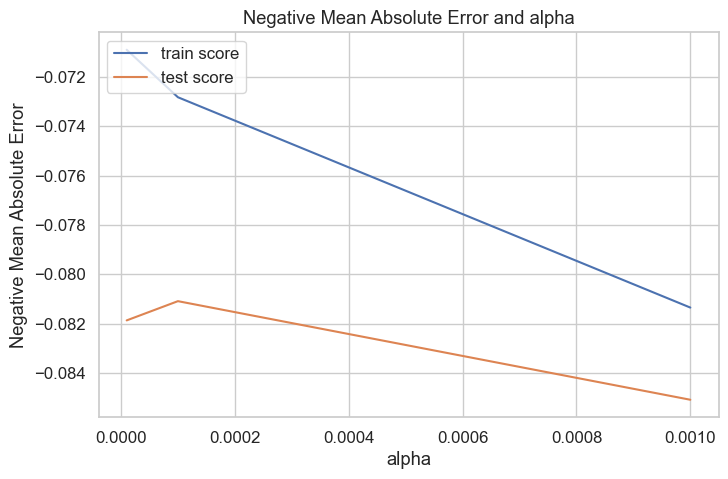

In [134]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [135]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [136]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9146359121969982
Lasso Regression test r2: 0.7209023406736356


In [137]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [138]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.783831,10.783831
10,FullBath,0.786474,0.786474
1,ExterQual,0.528539,0.528539
6,1stFlrSF,0.506503,0.506503
28,MSZoning_RH,0.501818,0.501818
